In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer

In [134]:
Train = pd.read_csv("Train[1].csv")
Test = pd.read_csv("Test[1].csv")

In [135]:
Train.shape, Test.shape

((8523, 12), (5681, 11))

In [136]:
Train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [137]:
Test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [138]:
Train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [139]:
Test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [140]:
Train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [141]:
Test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [142]:
Train.apply(lambda x : len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [143]:
Test.apply(lambda x : len(x.unique()))

Item_Identifier              1543
Item_Weight                   411
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

In [144]:
duplicate = Train.duplicated()
print(duplicate.sum())
Train[duplicate]

0


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [145]:
duplicate = Test.duplicated()
print(duplicate.sum())
Test[duplicate]

0


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type


In [146]:
median = Train["Item_Weight"].median()
Train["Item_Weight"].replace(np.nan,median,inplace=True)  

In [147]:
median = Test["Item_Weight"].median()
Test["Item_Weight"].replace(np.nan,median,inplace=True)  

In [148]:
mode = Train["Outlet_Size"].mode().values[0]               
Train["Outlet_Size"] = Train["Outlet_Size"].replace(np.nan,mode)

In [149]:
mode = Test["Outlet_Size"].mode().values[0]               
Test["Outlet_Size"] = Test["Outlet_Size"].replace(np.nan,mode)

<function matplotlib.pyplot.show(close=None, block=None)>

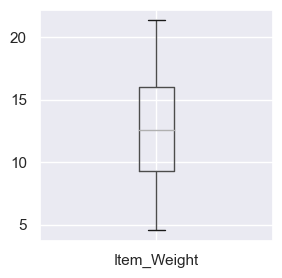

In [150]:
fig = plt.figure(figsize=(3,3))
gs = fig.add_gridspec(10,10)
Train.boxplot(column=["Item_Weight"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

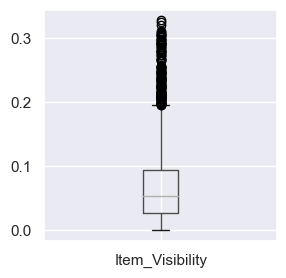

In [151]:
fig = plt.figure(figsize=(3,3))
gs = fig.add_gridspec(10,10)
Train.boxplot(column=["Item_Visibility"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

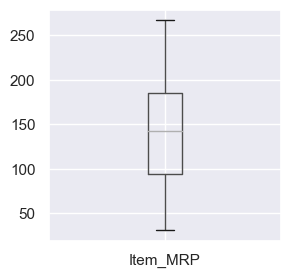

In [152]:
fig = plt.figure(figsize=(3,3))
gs = fig.add_gridspec(10,10)
Train.boxplot(column=["Item_MRP"])
plt.show

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

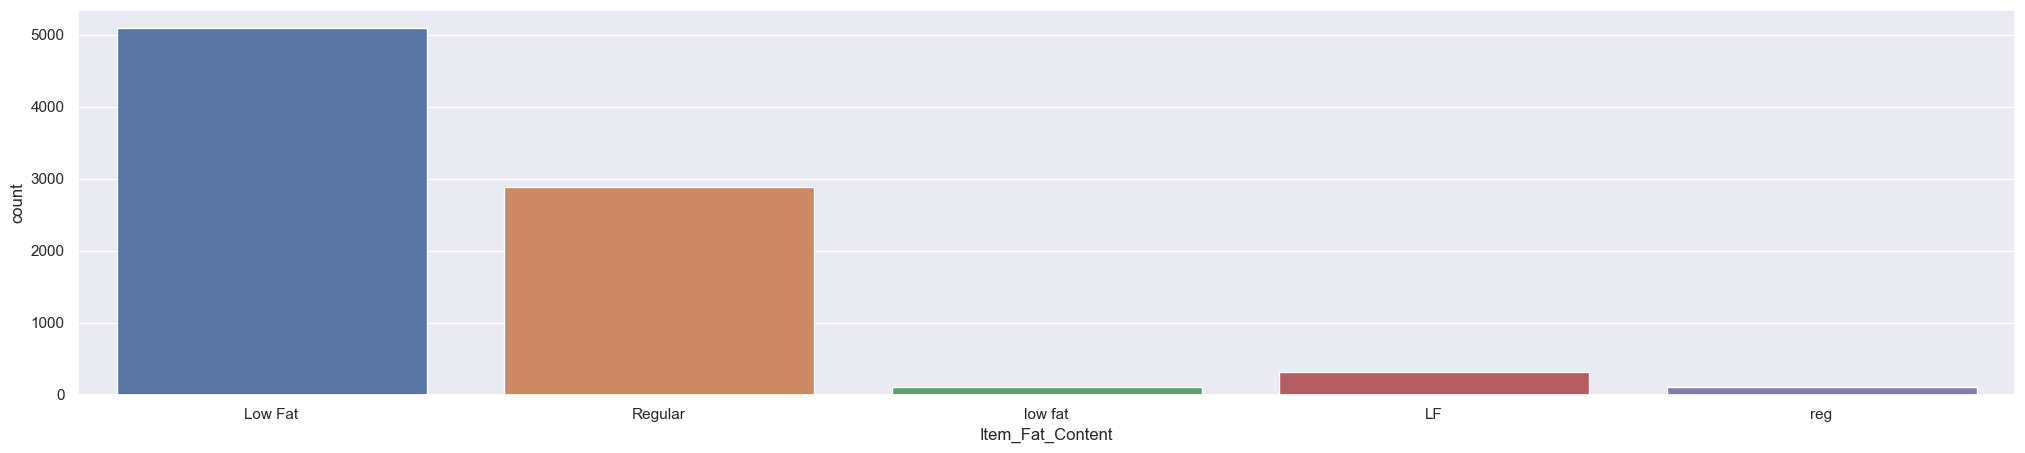

In [153]:
fig = plt.figure(figsize=(25,5))
gs = fig.add_gridspec(1,1)
print(Train.Item_Type.value_counts())
sns.set_theme(style="darkgrid")
ax=sns.countplot(data=Train, x="Item_Fat_Content")
plt.show

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

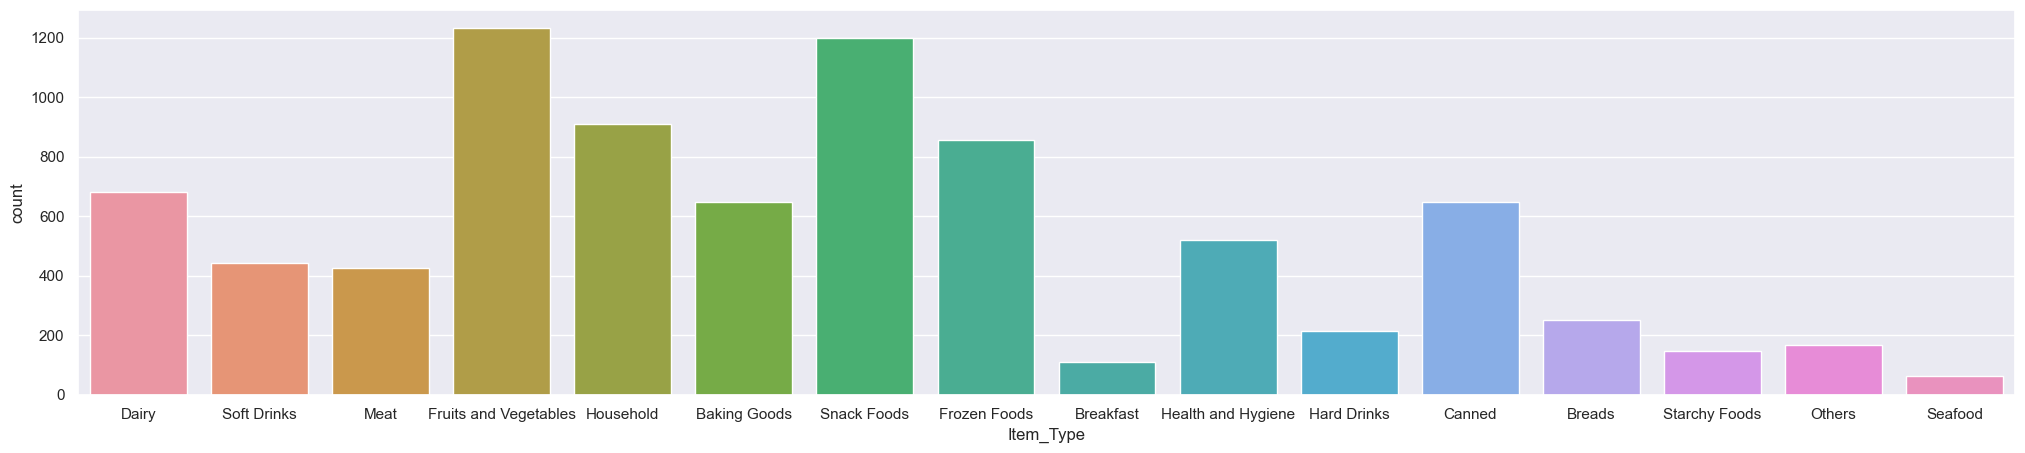

In [154]:
fig = plt.figure(figsize=(25,5))
gs = fig.add_gridspec(1,1)
print(Train.Item_Type.value_counts())
sns.set_theme(style="darkgrid")
ax=sns.countplot(data=Train, x="Item_Type")
plt.show

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

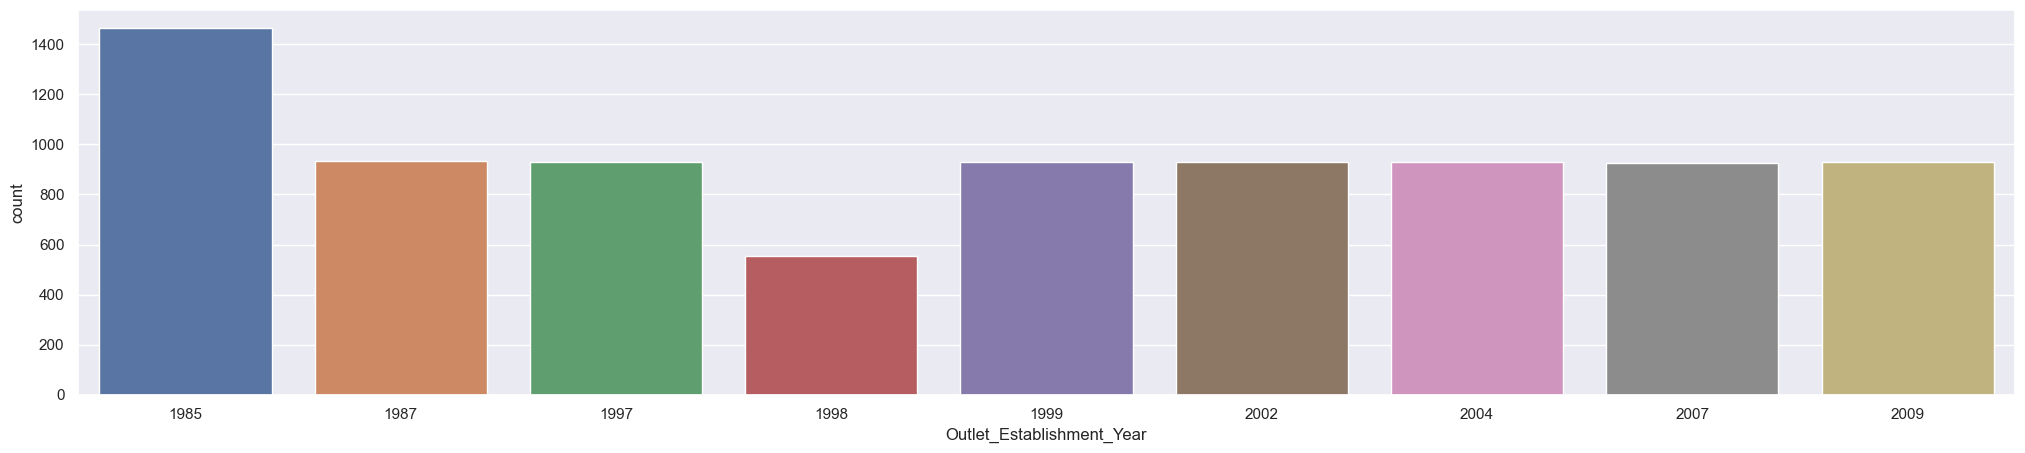

In [155]:
fig = plt.figure(figsize=(25,5))
gs = fig.add_gridspec(1,1)
print(Train.Outlet_Establishment_Year.value_counts())
sns.set_theme(style="darkgrid")
ax=sns.countplot(data=Train, x="Outlet_Establishment_Year")
plt.show

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

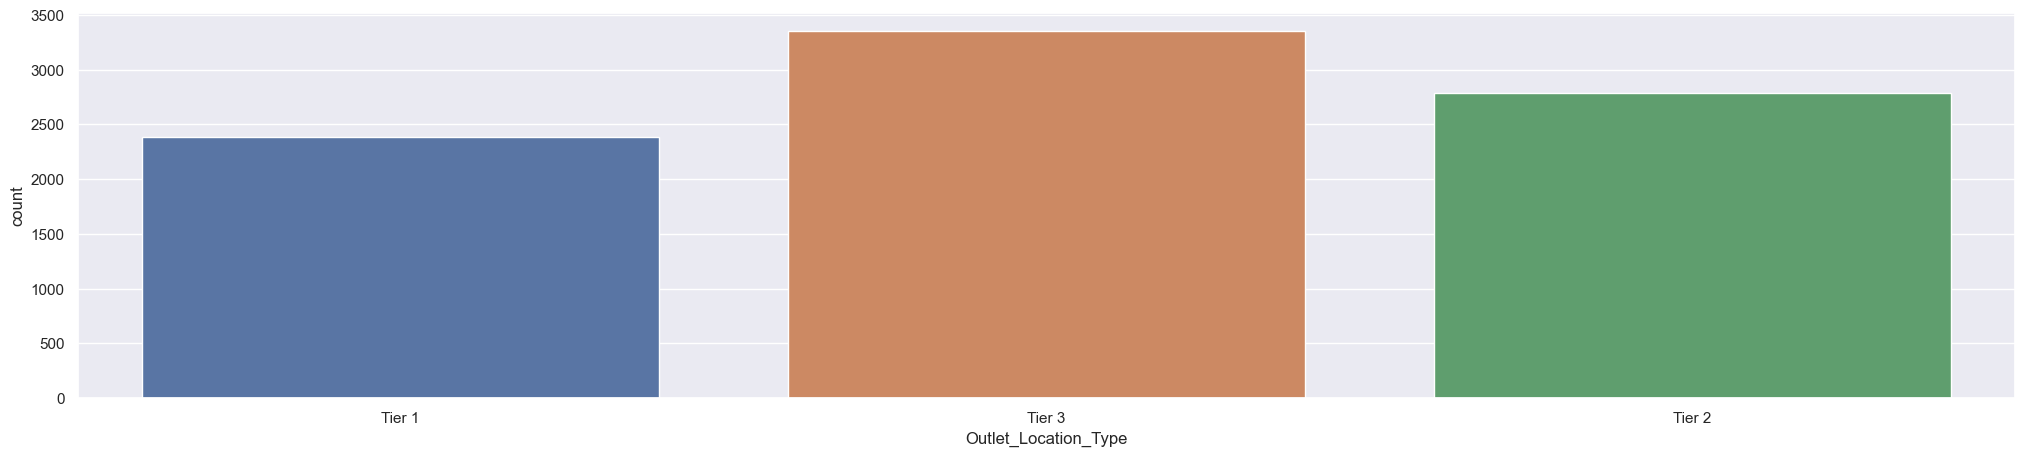

In [156]:
fig = plt.figure(figsize=(25,5))
gs = fig.add_gridspec(1,1)
print(Train.Outlet_Establishment_Year.value_counts())
sns.set_theme(style="darkgrid")
ax=sns.countplot(data=Train, x="Outlet_Location_Type")
plt.show

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

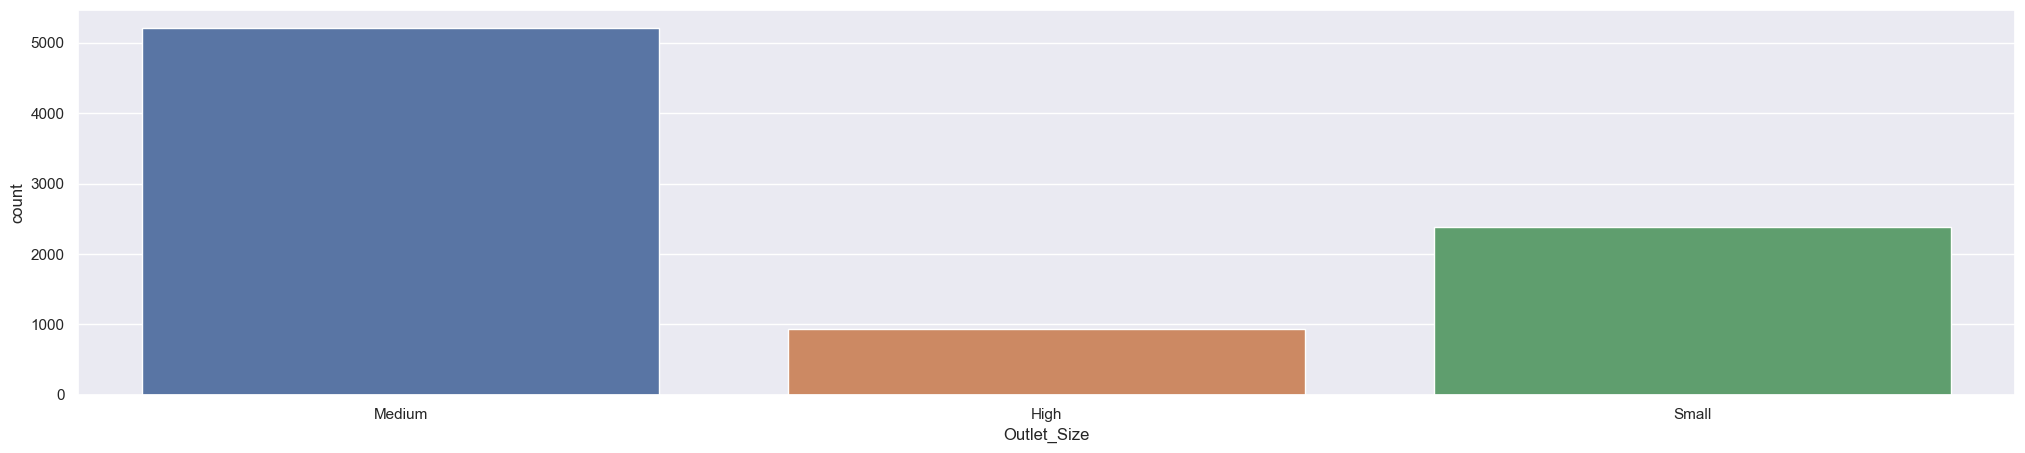

In [157]:
fig = plt.figure(figsize=(25,5))
gs = fig.add_gridspec(1,1)
print(Train.Outlet_Establishment_Year.value_counts())
sns.set_theme(style="darkgrid")
ax=sns.countplot(data=Train, x="Outlet_Size")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

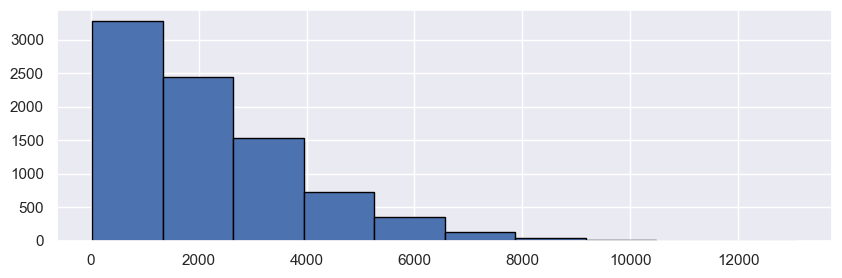

In [158]:
fig = plt.figure(figsize=(10,3))
gs = fig.add_gridspec(10,10)
plt.hist(Train['Item_Outlet_Sales'], edgecolor='black')
plt.show

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

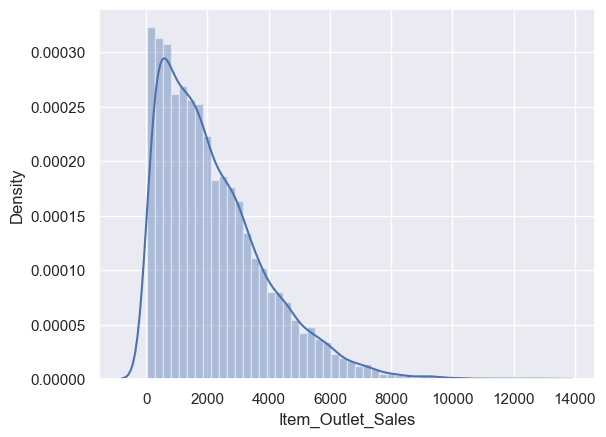

In [159]:
sns.distplot(Train['Item_Outlet_Sales'])

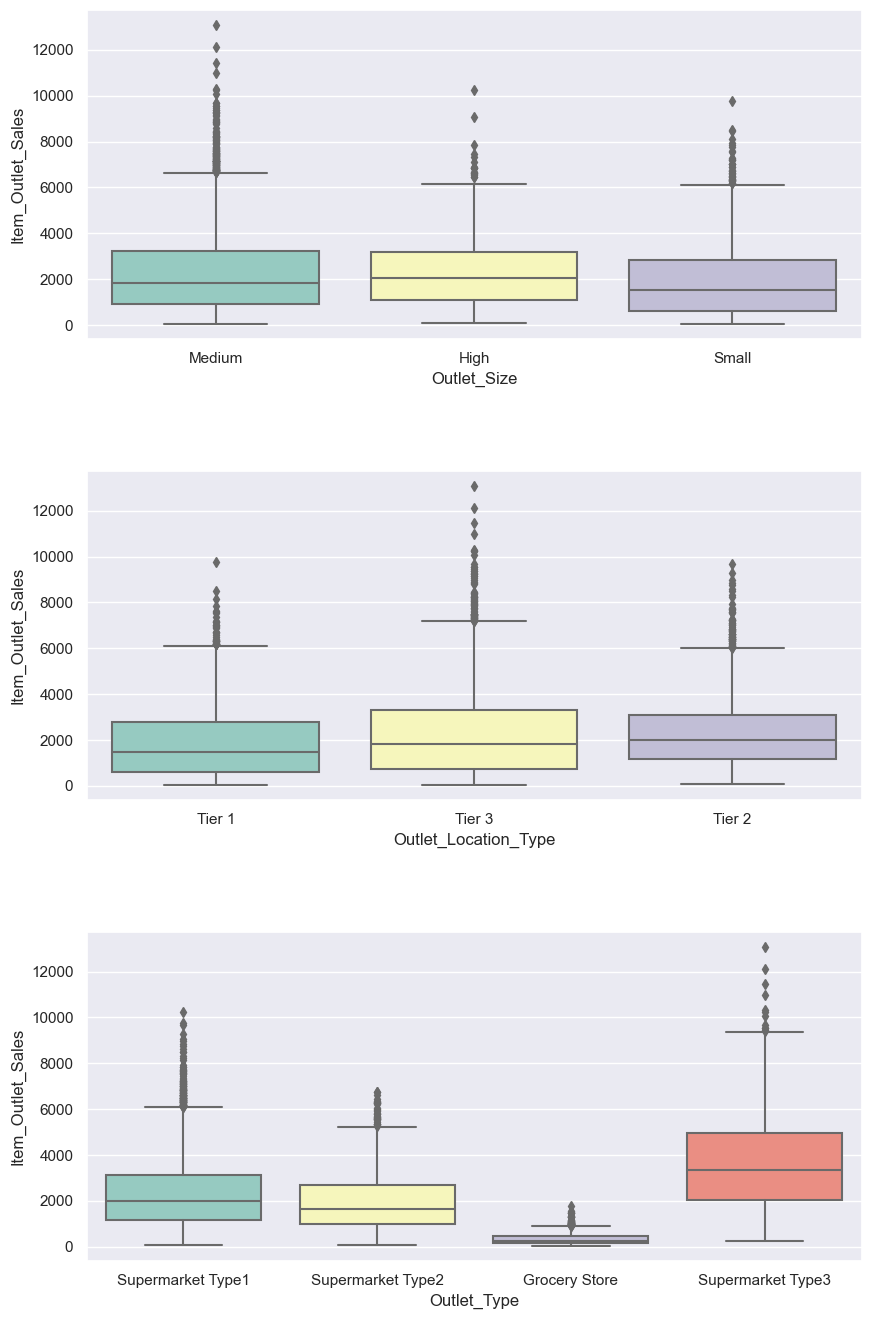

In [160]:
plt.figure(figsize = (10,9))

plt.subplot(311)
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=Train, palette="Set3")

plt.subplot(312)
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=Train, palette="Set3")

plt.subplot(313)
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=Train, palette="Set3")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

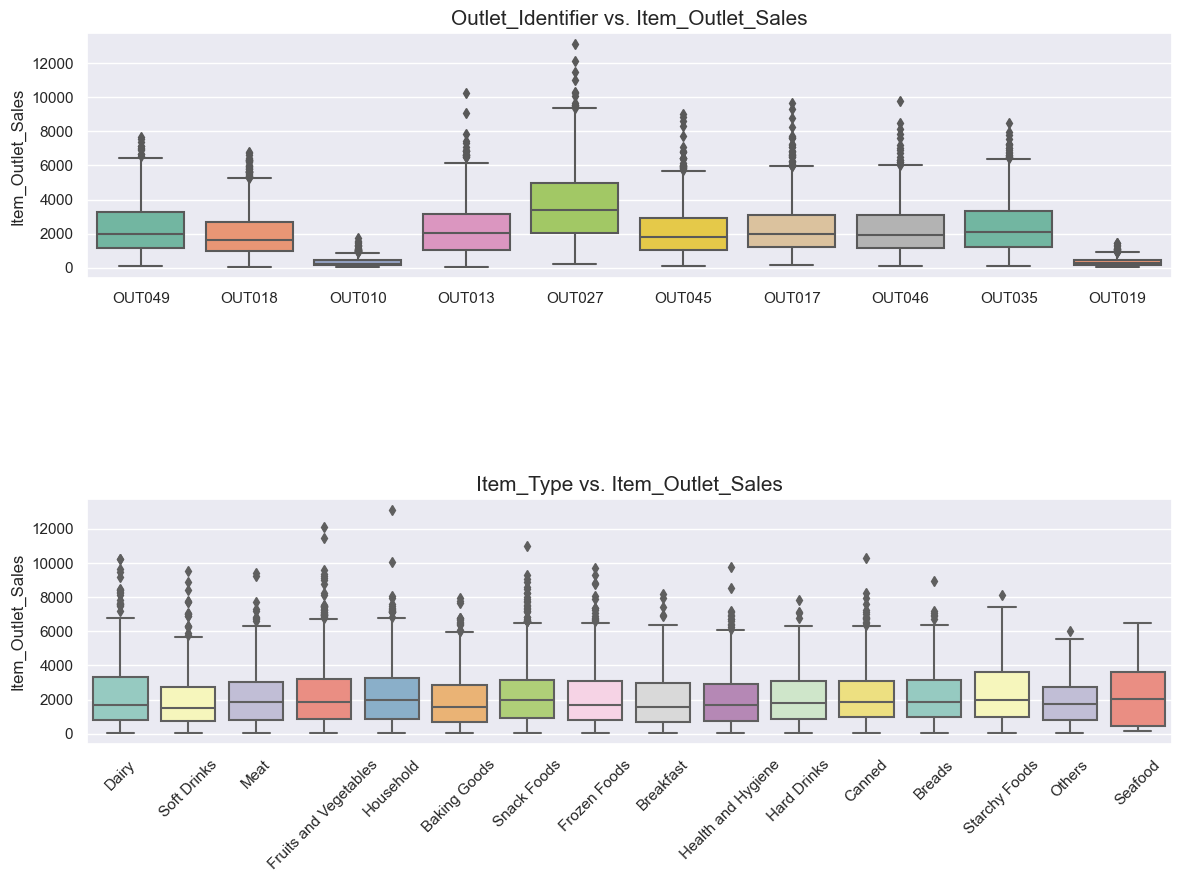

In [161]:
plt.figure(figsize = (14,9))

plt.subplot(211)
ax = sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=Train, palette="Set2")
ax.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplot(212)
ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=Train, palette="Set3")
ax.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

<Axes: xlabel='Outlet_Type'>

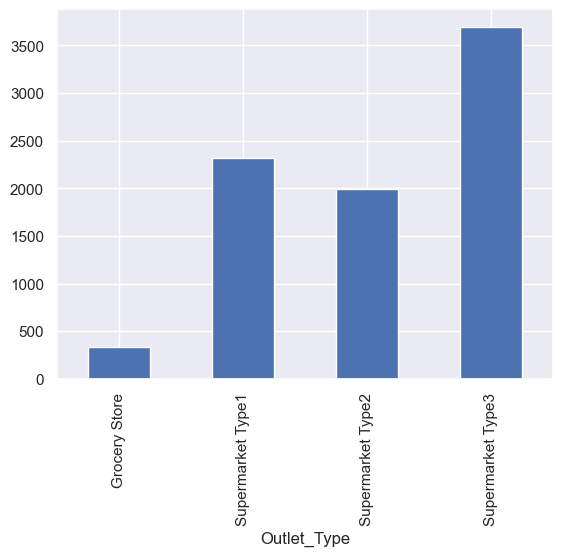

In [162]:
Train.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().plot.bar()

<Axes: xlabel='Outlet_Size'>

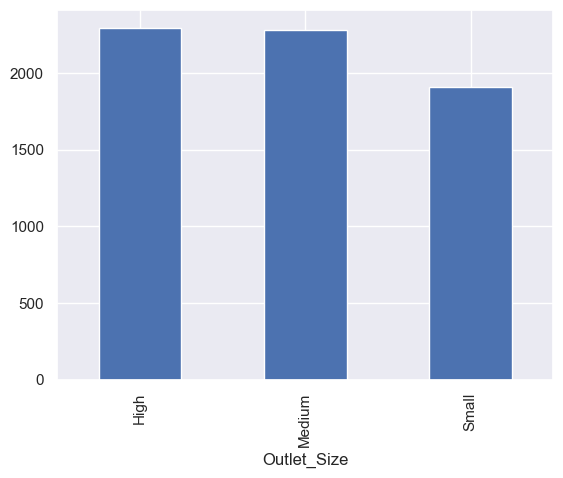

In [163]:
Train.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().plot.bar()

<Axes: xlabel='Outlet_Location_Type'>

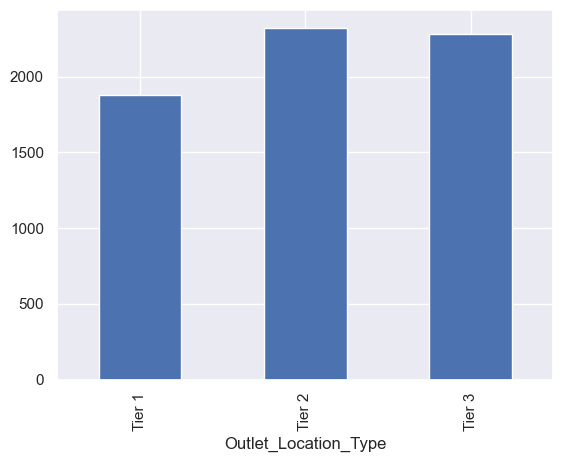

In [164]:
Train.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().plot.bar()

<Axes: xlabel='Outlet_Establishment_Year'>

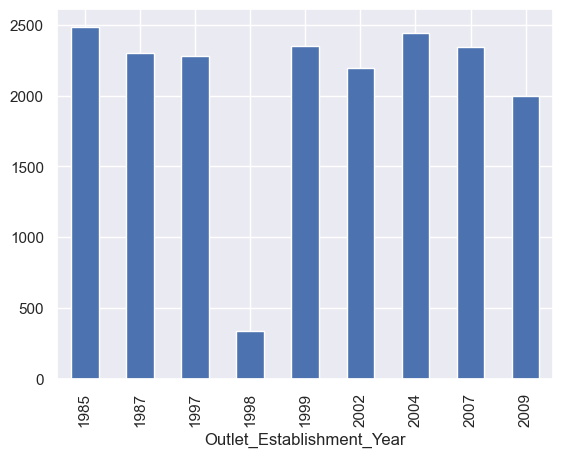

In [165]:
Train.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot.bar()

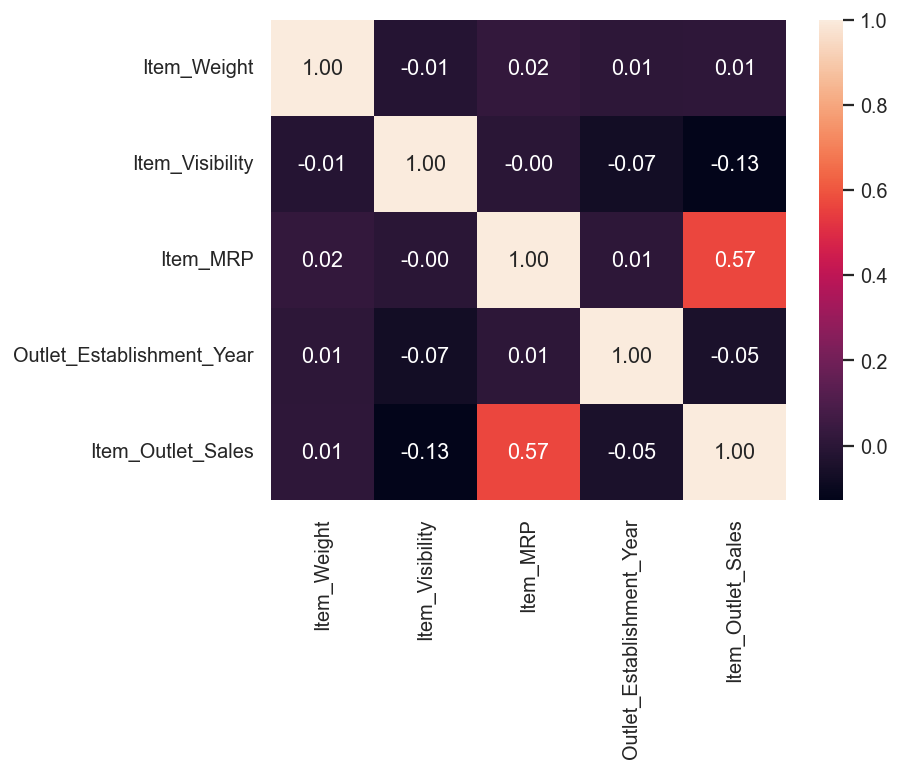

In [166]:
corr = Train.corr()
 
plt.figure(dpi=130)
sns.heatmap(Train.corr(), annot=True, fmt= '.2f')
plt.show()

In [167]:
ord_enc = OrdinalEncoder()
Train["Item_Identifier_code"] = ord_enc.fit_transform(Train[["Item_Identifier"]])
Train[["Item_Identifier", "Item_Identifier_code"]].head(1559)

,Item_Identifier,Item_Identifier_code
0,FDA15,156.0
1,DRC01,8.0
2,FDN15,662.0
3,FDX07,1121.0
4,NCD19,1297.0
...,...,...
1554,FDG17,403.0
1555,FDU58,1014.0
1556,FDP24,749.0
1557,NCT29,1493.0


In [168]:
ord_enc = OrdinalEncoder()
Train["Outlet_Identifier_code"] = ord_enc.fit_transform(Train[["Outlet_Identifier"]])
Train[["Outlet_Identifier", "Outlet_Identifier_code"]].head(10)

,Outlet_Identifier,Outlet_Identifier_code
0,OUT049,9.0
1,OUT018,3.0
2,OUT049,9.0
3,OUT010,0.0
4,OUT013,1.0
5,OUT018,3.0
6,OUT013,1.0
7,OUT027,5.0
8,OUT045,7.0
9,OUT017,2.0


In [169]:
ord_enc = OrdinalEncoder()
Train["Item_Type_code"] = ord_enc.fit_transform(Train[["Item_Type"]])
Train[["Item_Type", "Item_Type_code"]].head(5)

,Item_Type,Item_Type_code
0,Dairy,4.0
1,Soft Drinks,14.0
2,Meat,10.0
3,Fruits and Vegetables,6.0
4,Household,9.0


In [170]:
ord_enc = OrdinalEncoder()
Train["Item_Fat_Content_code"] = ord_enc.fit_transform(Train[["Item_Fat_Content"]])
Train[["Item_Fat_Content", "Item_Fat_Content_code"]].head(5)

,Item_Fat_Content,Item_Fat_Content_code
0,Low Fat,1.0
1,Regular,2.0
2,Low Fat,1.0
3,Regular,2.0
4,Low Fat,1.0


In [171]:
ord_enc = OrdinalEncoder()
Train["Outlet_Type_code"] = ord_enc.fit_transform(Train[["Outlet_Type"]])
Train[["Outlet_Type", "Outlet_Type_code"]].head(5)

,Outlet_Type,Outlet_Type_code
0,Supermarket Type1,1.0
1,Supermarket Type2,2.0
2,Supermarket Type1,1.0
3,Grocery Store,0.0
4,Supermarket Type1,1.0


In [172]:
ord_enc = OrdinalEncoder()
Train["Outlet_Size_code"] = ord_enc.fit_transform(Train[["Outlet_Size"]])
Train[["Outlet_Size", "Outlet_Size_code"]].head(5)

,Outlet_Size,Outlet_Size_code
0,Medium,1.0
1,Medium,1.0
2,Medium,1.0
3,Medium,1.0
4,High,0.0


In [173]:
ord_enc = OrdinalEncoder()
Train["Outlet_Location_Type_code"] = ord_enc.fit_transform(Train[["Outlet_Location_Type"]])
Train[["Outlet_Location_Type", "Outlet_Location_Type_code"]].head(5)

,Outlet_Location_Type,Outlet_Location_Type_code
0,Tier 1,0.0
1,Tier 3,2.0
2,Tier 1,0.0
3,Tier 3,2.0
4,Tier 3,2.0


In [174]:
Train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_code,Outlet_Identifier_code,Item_Type_code,Item_Fat_Content_code,Outlet_Type_code,Outlet_Size_code,Outlet_Location_Type_code
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,156.0,9.0,4.0,1.0,1.0,1.0,0.0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.0,3.0,14.0,2.0,2.0,1.0,2.0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,662.0,9.0,10.0,1.0,1.0,1.0,0.0
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,1121.0,0.0,6.0,2.0,0.0,1.0,2.0
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1297.0,1.0,9.0,1.0,1.0,0.0,2.0


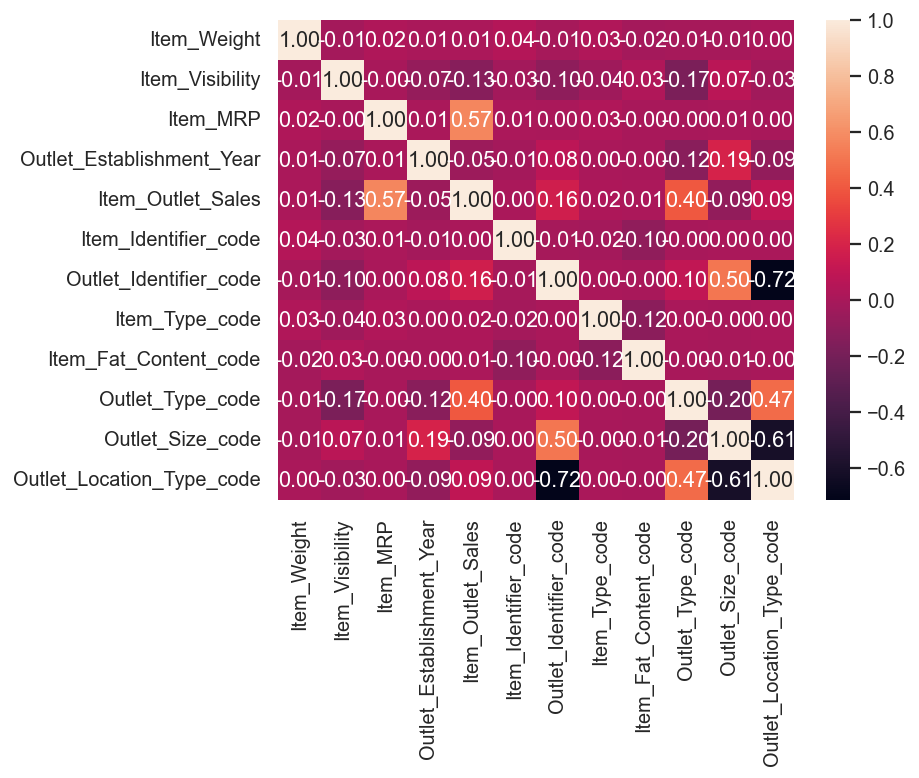

In [175]:
corr = Train.corr()
 
plt.figure(dpi=130)
sns.heatmap(Train.corr(), annot=True, fmt= '.2f')
plt.show()

In [176]:
Train = Train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Location_Type','Outlet_Type','Item_Type', 'Outlet_Size', 'Item_Fat_Content'],axis=1)

In [177]:
Train = Train.drop(['Item_Identifier_code', 'Outlet_Establishment_Year', 'Item_Visibility', 'Item_Type_code', 'Item_Fat_Content_code'], axis=1)

In [178]:
Train.head(3)

,Item_Weight,Item_MRP,Item_Outlet_Sales,Outlet_Identifier_code,Outlet_Type_code,Outlet_Size_code,Outlet_Location_Type_code
0,9.30,249.8092,3735.1380,9.0,1.0,1.0,0.0
1,5.92,48.2692,443.4228,3.0,2.0,1.0,2.0
2,17.50,141.6180,2097.2700,9.0,1.0,1.0,0.0


In [182]:
X = Train.drop('Item_Outlet_Sales', axis=1)
y = Train['Item_Outlet_Sales']
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 0.2,random_state=200)
print(" X_train dataset: ", X_Train.shape)
print(" y_train dataset: ", y_Train.shape)
print(" X_test dataset: ", X_Test.shape)
print(" y_test dataset: ", y_Test.shape)

 X_train dataset:  (6818, 6)
 y_train dataset:  (6818,)
 X_test dataset:  (1705, 6)
 y_test dataset:  (1705,)


In [184]:
LR = linear_model.LinearRegression()
LR.fit(X_train,y_train)
LinearRegression()
pred = LR.predict(X_test)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test,pred))

print('MEAN SQUARED ERROR :', mean_squared_error(y_test,pred))

MEAN ABSOLUTE ERROR : 871.5549208999249
MEAN SQUARED ERROR : 1362716.08197706


In [185]:
models = [LinearRegression()]
scores = []

for model in models:
   
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    scores.append({'Model': type(model).__name__, 'Scores' : model.score(X_test,y_test)})

Score_Train = pd.DataFrame(scores)

print(Score_Train)

              Model    Scores
0  LinearRegression  0.527965


In [186]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test,pred))
print('MEAN SQUARED ERROR :', mean_squared_error(y_test,pred))

MEAN ABSOLUTE ERROR : 871.5549208999249
MEAN SQUARED ERROR : 1362716.08197706


In [187]:
print (model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.5036233000402839
0.5279651382339059


In [188]:
from sklearn.metrics import r2_score

max_Accu=0
max_RS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test, pred)
    
    if r2>max_Accu:
        max_Accu=r2
        max_RS=i

print("Best r2 score is", max_Accu,"on Random State", max_RS)

Best r2 score is 0.5512567257418322 on Random State 247
